In [1]:

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
# %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Import data

In [2]:
import pandas as pd

#def load_cardio_data(cardio_path=os.getcwd()):
#    csv_path = os.path.join(cardio_path, "cardio_train.csv")
#    return pd.read_csv(csv_path,header=1)

In [3]:
#card_vasc = load_cardio_data()

In [4]:
#csv_path = os.path.join(os.getcwd(), "cardio_train.csv")
#card_vasc = pd.read_csv(csv_path, header=0)
#card_vasc.head

In [5]:
csv_path = os.path.join(os.getcwd(), "cardio_train.xlsx")
card_vasc = pd.read_excel(csv_path)
card_vasc.head

<bound method NDFrame.head of           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       sm

In [6]:
card_vasc["age"].value_counts()

18236    32
19741    32
20442    31
18253    31
20376    31
         ..
22265     1
22320     1
21447     1
20026     1
14329     1
Name: age, Length: 8076, dtype: int64

<AxesSubplot:>

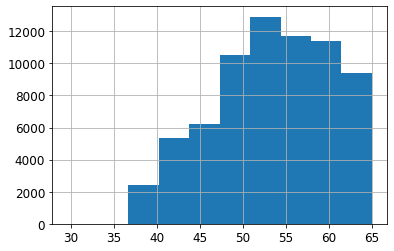

In [7]:
card_vasc["age"]=card_vasc["age"]/365
card_vasc["age"].hist()

Saving figure attribute_histogram_plots


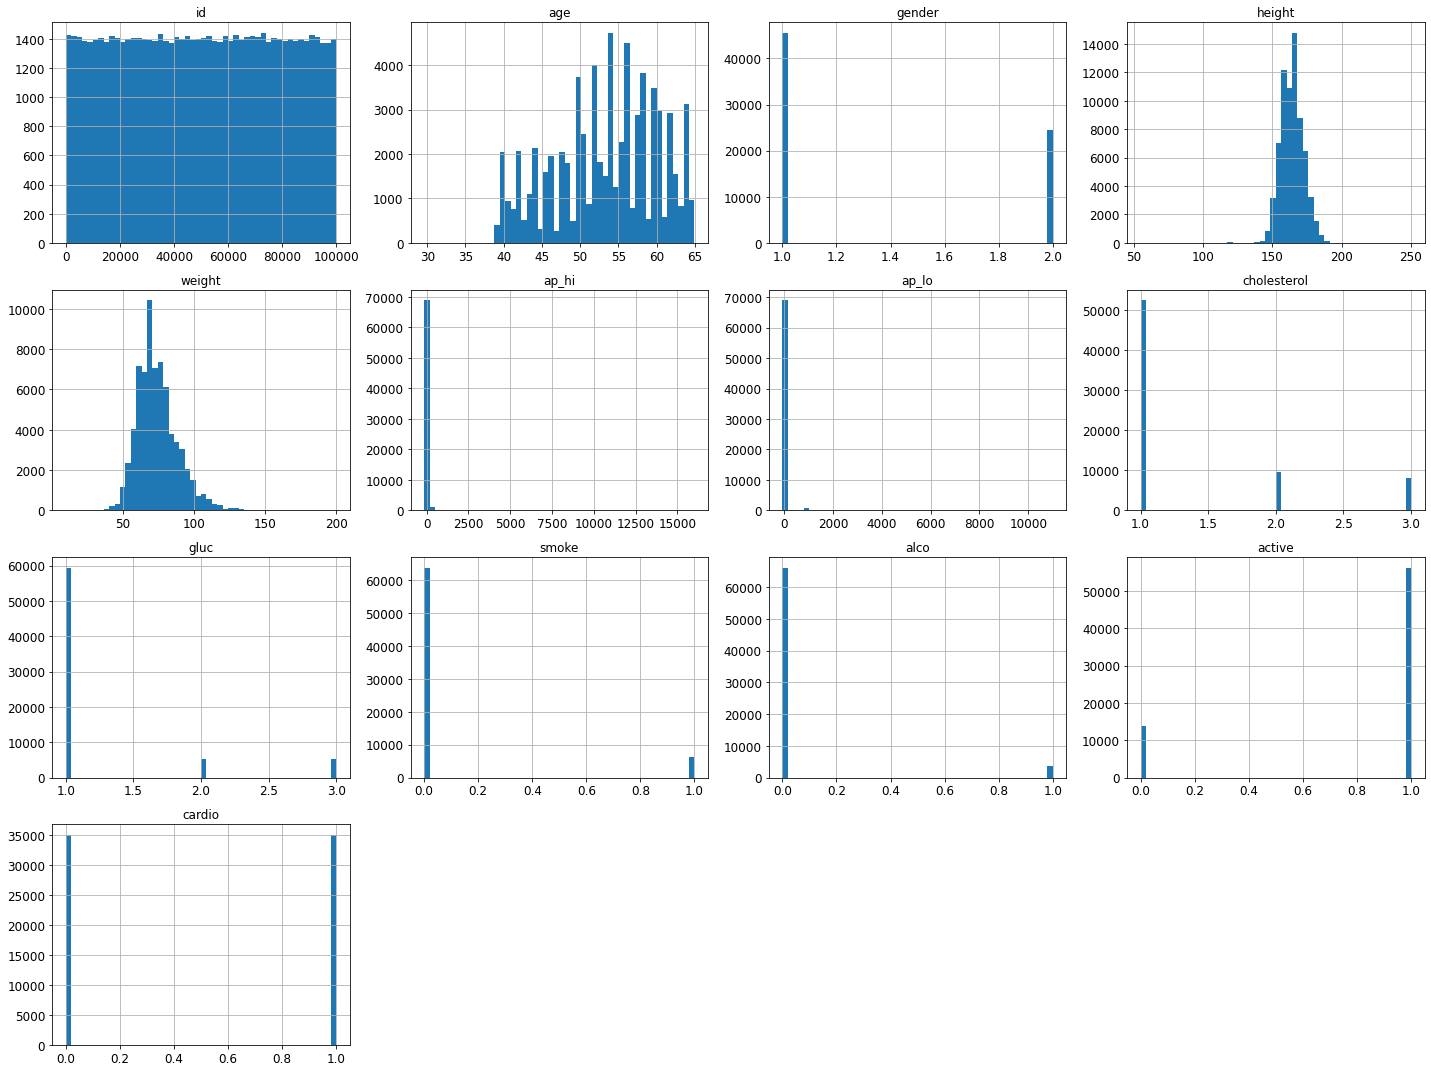

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
card_vasc.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [9]:
#wv = df['wv (m/s)']
#bad_wv = wv == -9999.0
#wv[bad_wv] = 0.0

#max_wv = df['max. wv (m/s)']
#bad_max_wv = max_wv == -9999.0
#max_wv[bad_max_wv] = 0.0

# The above inplace edits are reflected in the DataFrame.
#df['wv (m/s)'].min()

In [10]:
# to make this notebook's output identical at every run
np.random.seed(42)
print(np.random.seed(42))

None


In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(card_vasc, test_size=0.2, random_state=42)

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(card_vasc, card_vasc["cardio"]):
    strat_train_set = card_vasc.loc[train_index]
    strat_test_set = card_vasc.loc[test_index]

In [13]:
card_vasc = strat_train_set.drop("cardio", axis=1) # drop labels for training set
card_vasc_labels = strat_train_set["cardio"].copy()

In [14]:
card_vasc.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
58394,83327,52.041096,2,162,83.0,120,80,1,1,0,0,0
60371,86196,47.449315,1,158,64.0,120,80,1,1,0,0,1
41399,59158,52.101370,1,165,95.0,160,100,2,1,0,0,1
11468,16399,55.857534,1,164,83.0,150,100,1,1,0,0,1
20650,29470,49.961644,1,156,52.0,100,67,1,1,0,0,0


In [15]:
test_set.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
46730,66728,59.643836,1,156,64.0,140,80,2,1,0,0,1,1
48393,69098,59.934247,1,170,85.0,160,90,1,1,0,0,1,1
41416,59185,63.753425,1,151,90.0,130,80,1,1,0,0,1,1
34506,49288,54.084932,1,159,97.0,120,80,1,1,0,0,1,1
43725,62481,50.397260,1,164,68.0,120,80,1,1,0,0,1,0


In [16]:
strat_test_set.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
18682,26681,53.112329,1,155,59.5,120,85,1,1,0,0,1,0
40992,58585,57.756164,1,160,59.0,130,90,1,1,0,0,1,0
38068,54339,41.449315,2,175,88.0,120,80,2,1,0,0,1,0
12096,17273,51.465753,2,177,62.0,120,90,1,1,0,0,1,1
17791,25420,49.783562,1,167,81.0,120,80,1,1,0,0,1,1


In [17]:
strat_train_set.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
58394,83327,52.041096,2,162,83.0,120,80,1,1,0,0,0,1
60371,86196,47.449315,1,158,64.0,120,80,1,1,0,0,1,0
41399,59158,52.101370,1,165,95.0,160,100,2,1,0,0,1,1
11468,16399,55.857534,1,164,83.0,150,100,1,1,0,0,1,1
20650,29470,49.961644,1,156,52.0,100,67,1,1,0,0,0,0
